# Theory

* Ridge and Lasso Regression are types of Regularization techniques
* Regularization techniques are used to deal with overfitting and when the dataset is large
* Ridge and Lasso Regression involve adding penalties to the regression function

They work by penalizing the magnitude of coefficients of features along with minimizing the error between predicted and actual observations. These are called ‘regularization’ techniques. The key difference is in how they assign penalty to the coefficients:

**Ridge Regression -**
* Performs L2 regularization, i.e. adds penalty equivalent to square of the magnitude of coefficients
* Minimization objective = LS Obj + α * (sum of square of coefficients)

**Lasso Regression -**
* Performs L1 regularization, i.e. adds penalty equivalent to absolute value of the magnitude of coefficients
* Minimization objective = LS Obj + α * (sum of absolute value of coefficients)

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 

# Ridge Regression

In [2]:
# Image("Coefficients_magnitude.png",width=800)

* It is clearly evident that the size of coefficients increase exponentially with increase in model complexity. What does a large coefficient signify? It means that we’re putting a lot of emphasis on that feature, i.e. the particular feature is a good predictor for the outcome. When it becomes too large, the algorithm starts modelling intricate relations to estimate the output and ends up overfitting to the particular training data

In [3]:
# Image("Coefficients_magnitude_2.png",width=800)

We clearly observe that as the value of alpha increases, the model complexity reduces. Though higher values of alpha reduce overfitting, significantly high values can cause underfitting as well (eg. alpha = 5). Thus alpha should be chosen wisely. A widely accept technique is cross-validation, i.e. the value of alpha is iterated over a range of values and the one giving higher cross-validation score is chosen.

* The RSS increases with increase in alpha, this model complexity reduces
* An alpha as small as 1e-15 gives us significant reduction in magnitude of coefficients. How? Compare the coefficients in the first row of this table to the last row of simple linear regression table.
* High alpha values can lead to significant underfitting. Note the rapid increase in RSS for values of alpha greater than 1
* Though the coefficients are very very small, they are NOT zero.

# LASSO - Least Absolute Shrinkage and Selection Operator

In [4]:
# Image("Lasso_coefficients_magnitude.png",width=800)

Apart from the expected inference of higher RSS for higher alphas, we can see the following:

* For the same values of alpha, the coefficients of lasso regression are much smaller as compared to that of ridge regression (compare row 1 of the 2 tables).
* For the same alpha, lasso has higher RSS (poorer fit) as compared to ridge regression
* Many of the coefficients are zero even for very small values of alpha

We can observe that even for a small value of alpha, a significant number of coefficients are zero. This also explains the horizontal line fit for alpha=1 in the lasso plots, its just a baseline model! This phenomenon of most of the coefficients being zero is called ‘sparsity‘. Although lasso performs feature selection, this level of sparsity is achieved in special cases only which we’ll discuss towards the end

## Use Cases

**Ridge:** It is majorly used to prevent overfitting. Since it includes all the features, it is not very useful in case of exorbitantly high #features, say in millions, as it will pose computational challenges.

**Lasso:** Since it provides sparse solutions, it is generally the model of choice (or some variant of this concept) for modelling cases where the #features are in millions or more. In such a case, getting a sparse solution is of great computational advantage as the features with zero coefficients can simply be ignored.

# Presence of Highly Correlated Features

**Ridge:** It generally works well even in presence of highly correlated features as it will include all of them in the model but the coefficients will be distributed among them depending on the correlation.

**Lasso:** It arbitrarily selects any one feature among the highly correlated ones and reduced the coefficients of the rest to zero. Also, the chosen variable changes randomly with change in model parameters. This generally doesn’t work that well as compared to ridge regression.

This disadvantage of lasso can be observed in the example we discussed above. Since we used a polynomial regression, the variables were highly correlated. ( Not sure why? Check the output of data.corr() ). Thus, we saw that even small values of alpha were giving significant sparsity (i.e. high #coefficients as zero).

Along with Ridge and Lasso, Elastic Net is another useful techniques which combines both L1 and L2 regularization. It can be used to balance out the pros and cons of ridge and lasso regression. I encourage you to explore it further.

https://xavierbourretsicotte.github.io/

In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
%matplotlib inline
pd.options.display.max_rows = 1000
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
#warning hadle
warnings.filterwarnings("ignore")

In [190]:
df =  pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [191]:
df.shape

(1460, 81)

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [193]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


# Missing Values

In [194]:
mis_val = df.isnull().sum()
mis_val_percentage = 100*mis_val/len(df)
missing_val = pd.concat([mis_val,mis_val_percentage],axis =1)
missing_val = missing_val.rename(columns = {0:'Missing Values',1:'% of Total Values'})
missing_val = missing_val.sort_values('Missing Values',ascending = False)
missing_val.head(10)

,Missing Values,% of Total Values
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageCond,81,5.547945
GarageType,81,5.547945
GarageFinish,81,5.547945


## Dropping variables which has high missing values 

In [195]:
# variable containing the columns that we want to remove
miss_data_col = ['Alley','PoolQC', 'Fence', 'MiscFeature']
df = df.drop(miss_data_col,axis=1)
df.shape

(1460, 77)

## Dropping Id variable

In [196]:
# df = df.drop('Id',axis=1)
# df.shape

In [197]:
# Check for duplicate data
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 0


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


# Target Feature: SalePrice

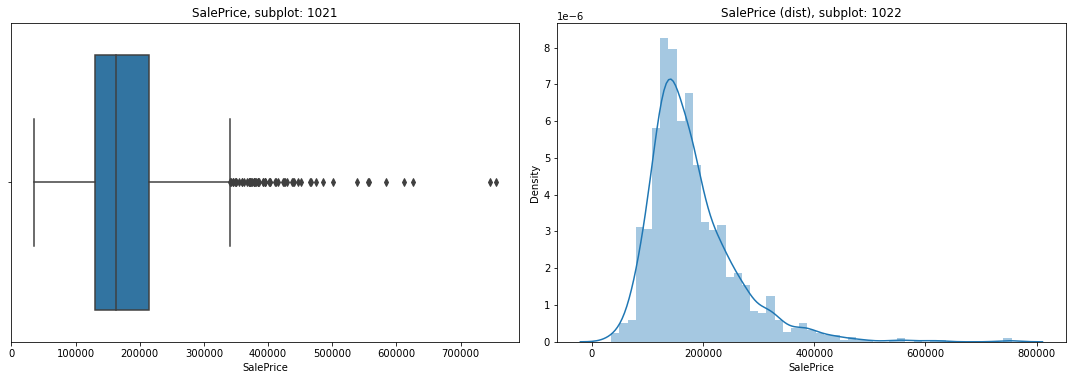

In [198]:
target_col = ['SalePrice']
a = 10  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15, 50)

for i in target_col:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.boxplot(df[i])
    c = c + 1
    
    plt.subplot(a, b, c)
    plt.title('{} (dist), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.distplot(df[i])
    c = c + 1
    
   

plt.tight_layout()
plt.show();

Two observations here - Our target variable contains outliers in the data also it is right skewed - not normally distributed. We will take log transformation on our target variable

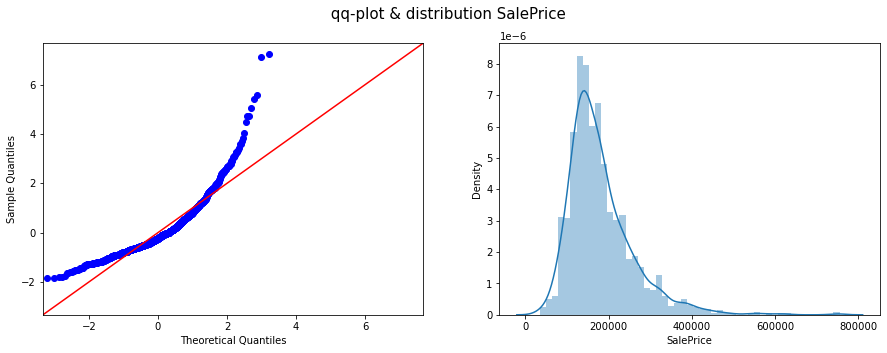

In [199]:
import statsmodels.api as sm
from scipy import stats

fig, ax = plt.subplots(1,2, figsize= (15,5))
fig.suptitle(" qq-plot & distribution SalePrice ", fontsize= 15)

sm.qqplot(df['SalePrice'], stats.t, distargs=(4,),fit=True, line="45", ax = ax[0])

sns.distplot(df['SalePrice'], kde = True, hist=True, ax = ax[1])
plt.show()

In [200]:
df['SalePrice_log'] = np.log(df['SalePrice'])

In [201]:
saleprice = df[['SalePrice']].copy()
df = df.drop('SalePrice',axis=1) # removing the orignal variable

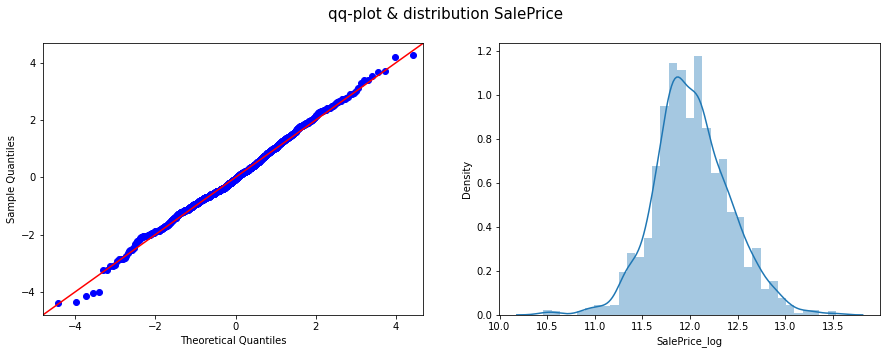

In [202]:
fig, ax = plt.subplots(1,2, figsize= (15,5))
fig.suptitle("qq-plot & distribution SalePrice ", fontsize= 15)

sm.qqplot(df['SalePrice_log'] , stats.t, distargs=(4,),fit=True, line="45", ax = ax[0])
sns.distplot(df['SalePrice_log'] , kde = True, hist=True, ax = ax[1])
plt.show()

In [203]:
# target_col = ['SalePrice_log']
# a = 10  # number of rows
# b = 2  # number of columns
# c = 1  # initialize plot counter

# fig = plt.figure(figsize=(50,40))
# fig.set_size_inches(15, 50)

# for i in target_col:
#     plt.subplot(a, b, c)
#     plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
#     plt.xlabel(i)
#     sns.boxplot(df[i])
#     c = c + 1
    
#     plt.subplot(a, b, c)
#     plt.title('{} (dist), subplot: {}{}{}'.format(i, a, b, c))
#     plt.xlabel(i)
#     sns.distplot(df[i])
#     c = c + 1

# plt.tight_layout()
# plt.show();

# Outliers Detection

In [204]:
num_col = df.select_dtypes(include=np.number).columns.tolist()
num_col[:5]

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual']

In [205]:
num_data = df[num_col]
num_data.shape

(1460, 38)

In [206]:
num_data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice_log
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,12.247694
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,12.109011
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,12.317167
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,11.849398
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,12.429216


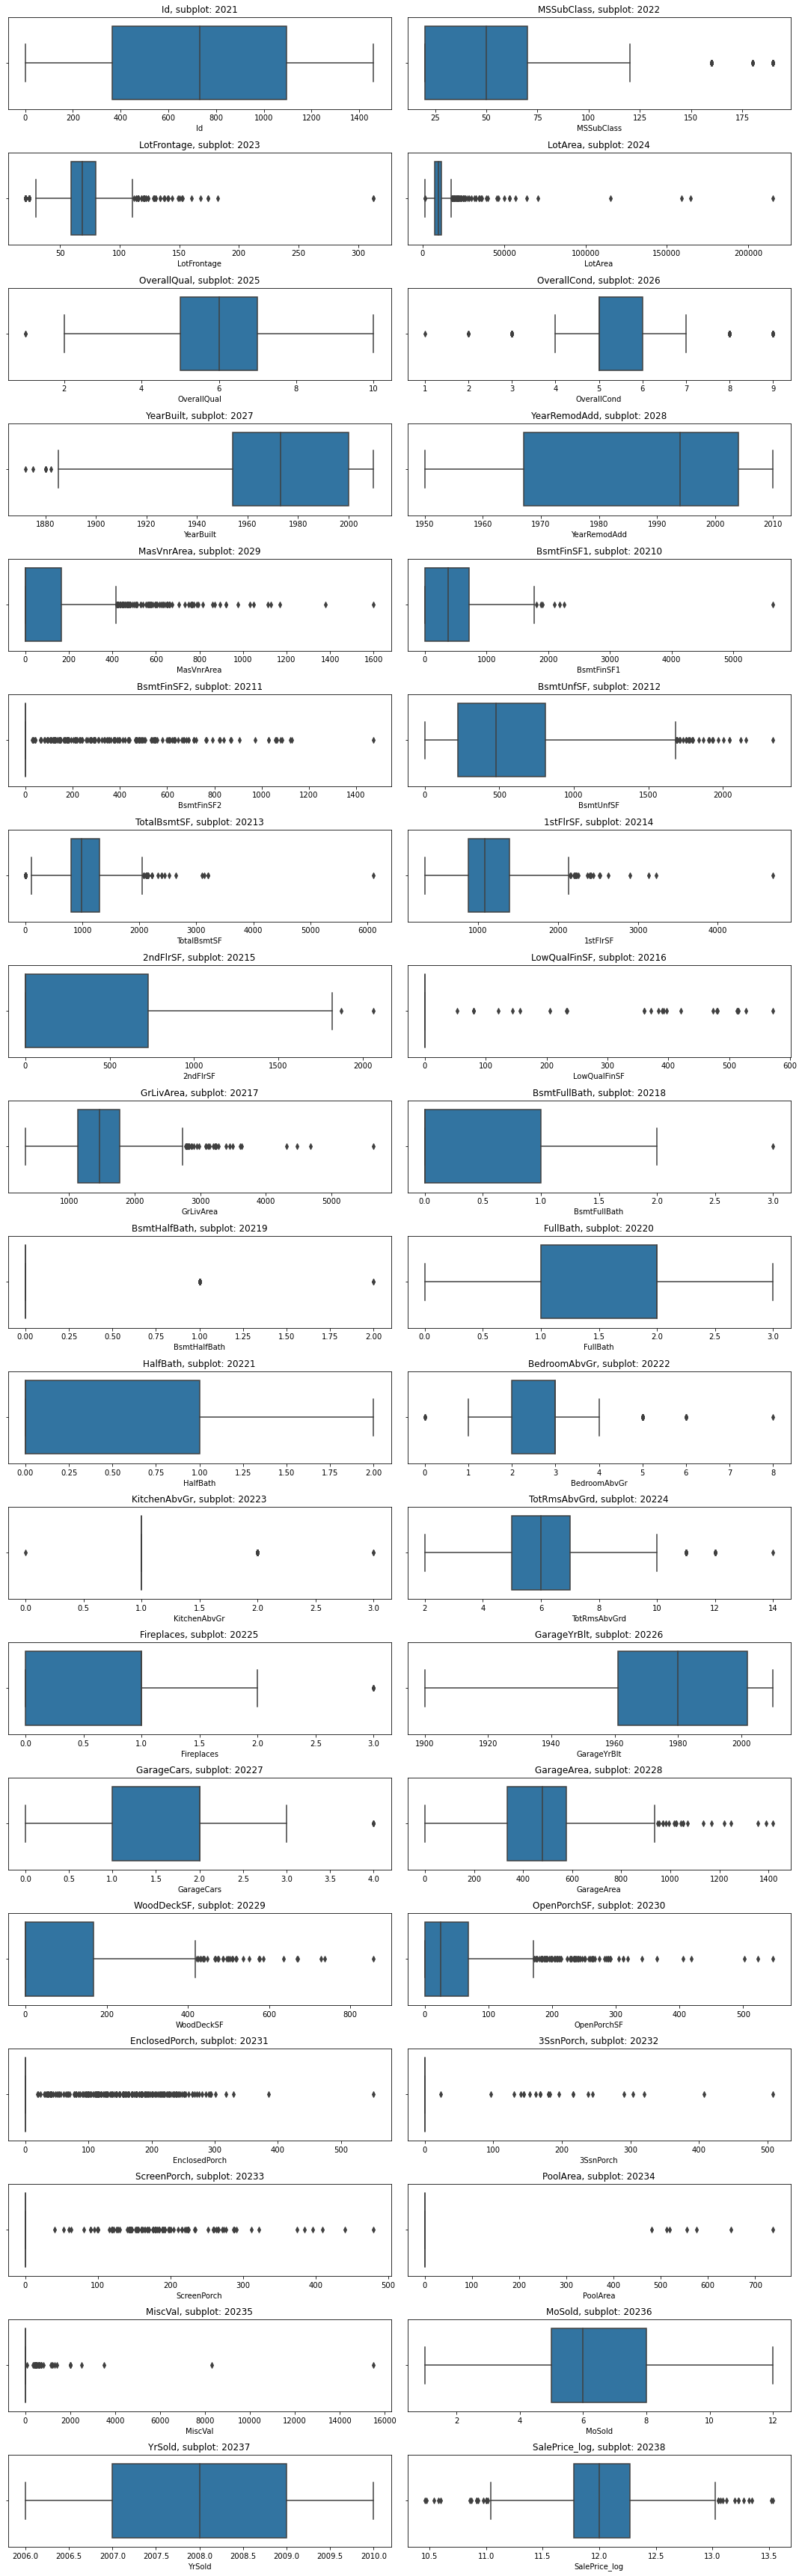

In [207]:
a = 20
b = 2
c = 1

fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15, 50)

for i in num_col:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.boxplot(num_data[i])
    c = c + 1

    plt.tight_layout()
plt.show();

# Treat Missing Values - Presence of Outliers in the data

## Numerical columns

In [208]:
num_data.isnull().sum().sort_values(ascending=False)[:10]

LotFrontage     259
GarageYrBlt      81
MasVnrArea        8
Id                0
OpenPorchSF       0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageCars        0
GarageArea        0
dtype: int64

#### Check the target variable carefully

In [209]:
# Importing the SimpleImputer class 
from sklearn.impute import SimpleImputer

In [210]:
imputer = SimpleImputer(missing_values = np.nan,strategy ='median')

In [211]:
num_data['LotFrontage'] = imputer.fit_transform(num_data[['LotFrontage']].copy()).ravel()
num_data['GarageYrBlt'] = imputer.fit_transform(num_data[['GarageYrBlt']].copy()).ravel()
num_data['MasVnrArea'] = imputer.fit_transform(num_data[['MasVnrArea']].copy()).ravel()

In [212]:
num_data.isnull().sum().sort_values(ascending=False)[:10]

Id              0
WoodDeckSF      0
BedroomAbvGr    0
KitchenAbvGr    0
TotRmsAbvGrd    0
Fireplaces      0
GarageYrBlt     0
GarageCars      0
GarageArea      0
OpenPorchSF     0
dtype: int64

In [213]:
print("Shape of the data",num_data.shape)

Shape of the data (1460, 38)


<AxesSubplot:>

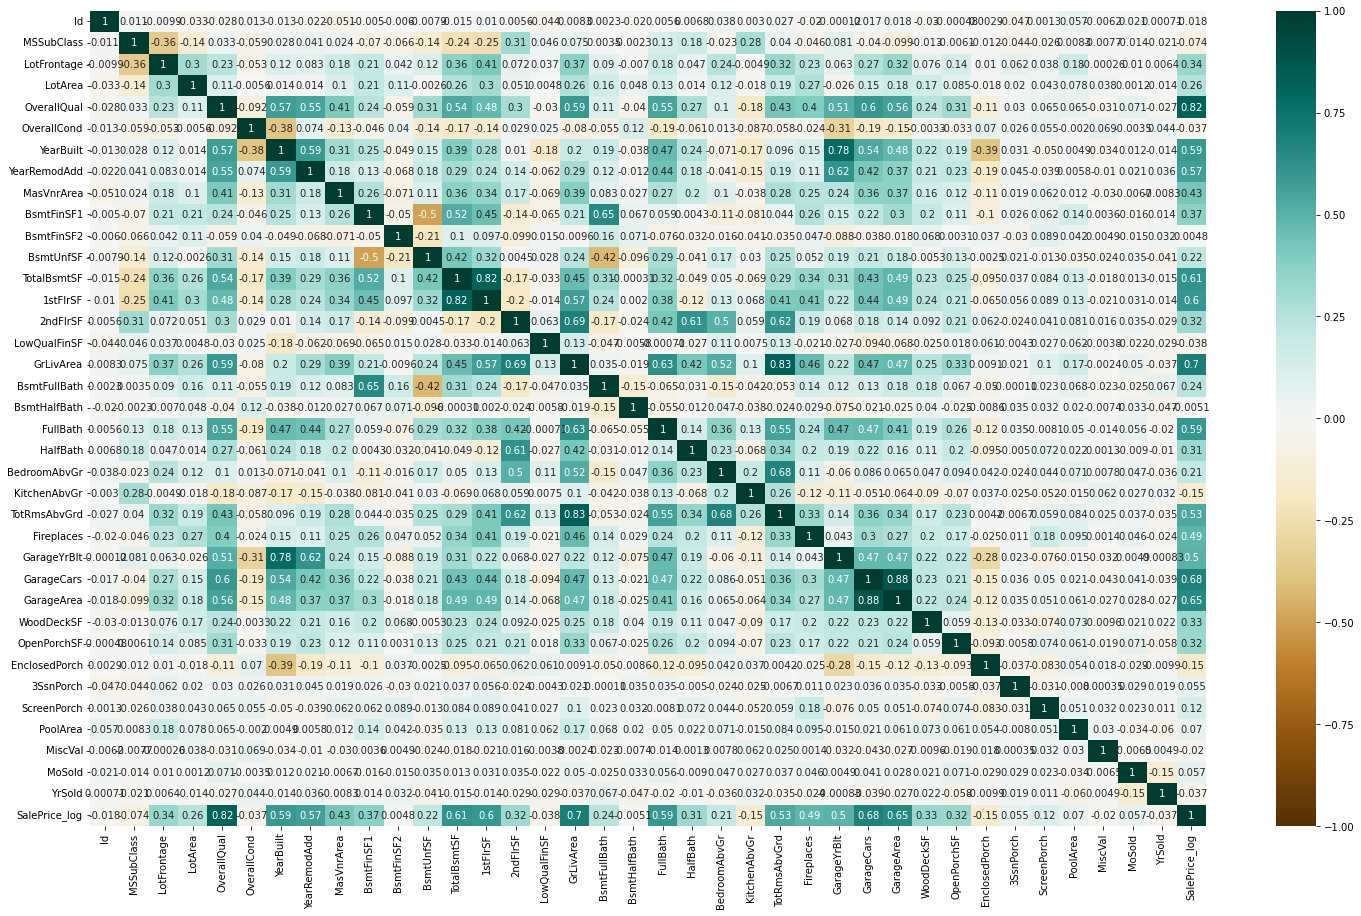

In [214]:
plt.figure(figsize=(25, 15))

sns.heatmap(num_data.corr(),annot=True,vmin=-1, vmax=1, cmap='BrBG')

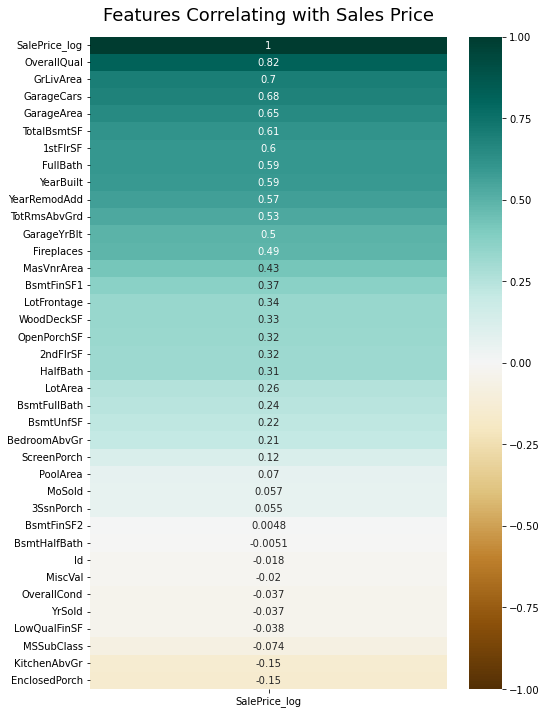

In [215]:
plt.figure(figsize=(8, 12))
heatmap_outputvar = sns.heatmap(num_data.corr()[['SalePrice_log']].sort_values(by='SalePrice_log', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap_outputvar.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16);

~10 features are coming important with having higher correlation with target variable

## Skewness in the numerical features

In [216]:
# from scipy.stats import skew 
# skew_in_vars = num_data.iloc[:,:-1].apply(lambda x: skew(x))
# skew_in_vars.sort_values(ascending=False)

In [33]:
# high_skew = skew_in_vars[skew_in_vars > 0.5]
# skew_index = high_skew.index
# skew_index

In [34]:
# len(skew_index)

## Transforming the X- Feature (Log tranformation)

In [35]:
# for i in skew_index:
#     num_data[i] = np.log1p(num_data[i])

In [36]:
# num_data.apply(lambda x: skew(x)).sort_values(ascending=False)

In [217]:
num_data.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice_log'],
      dtype='object')

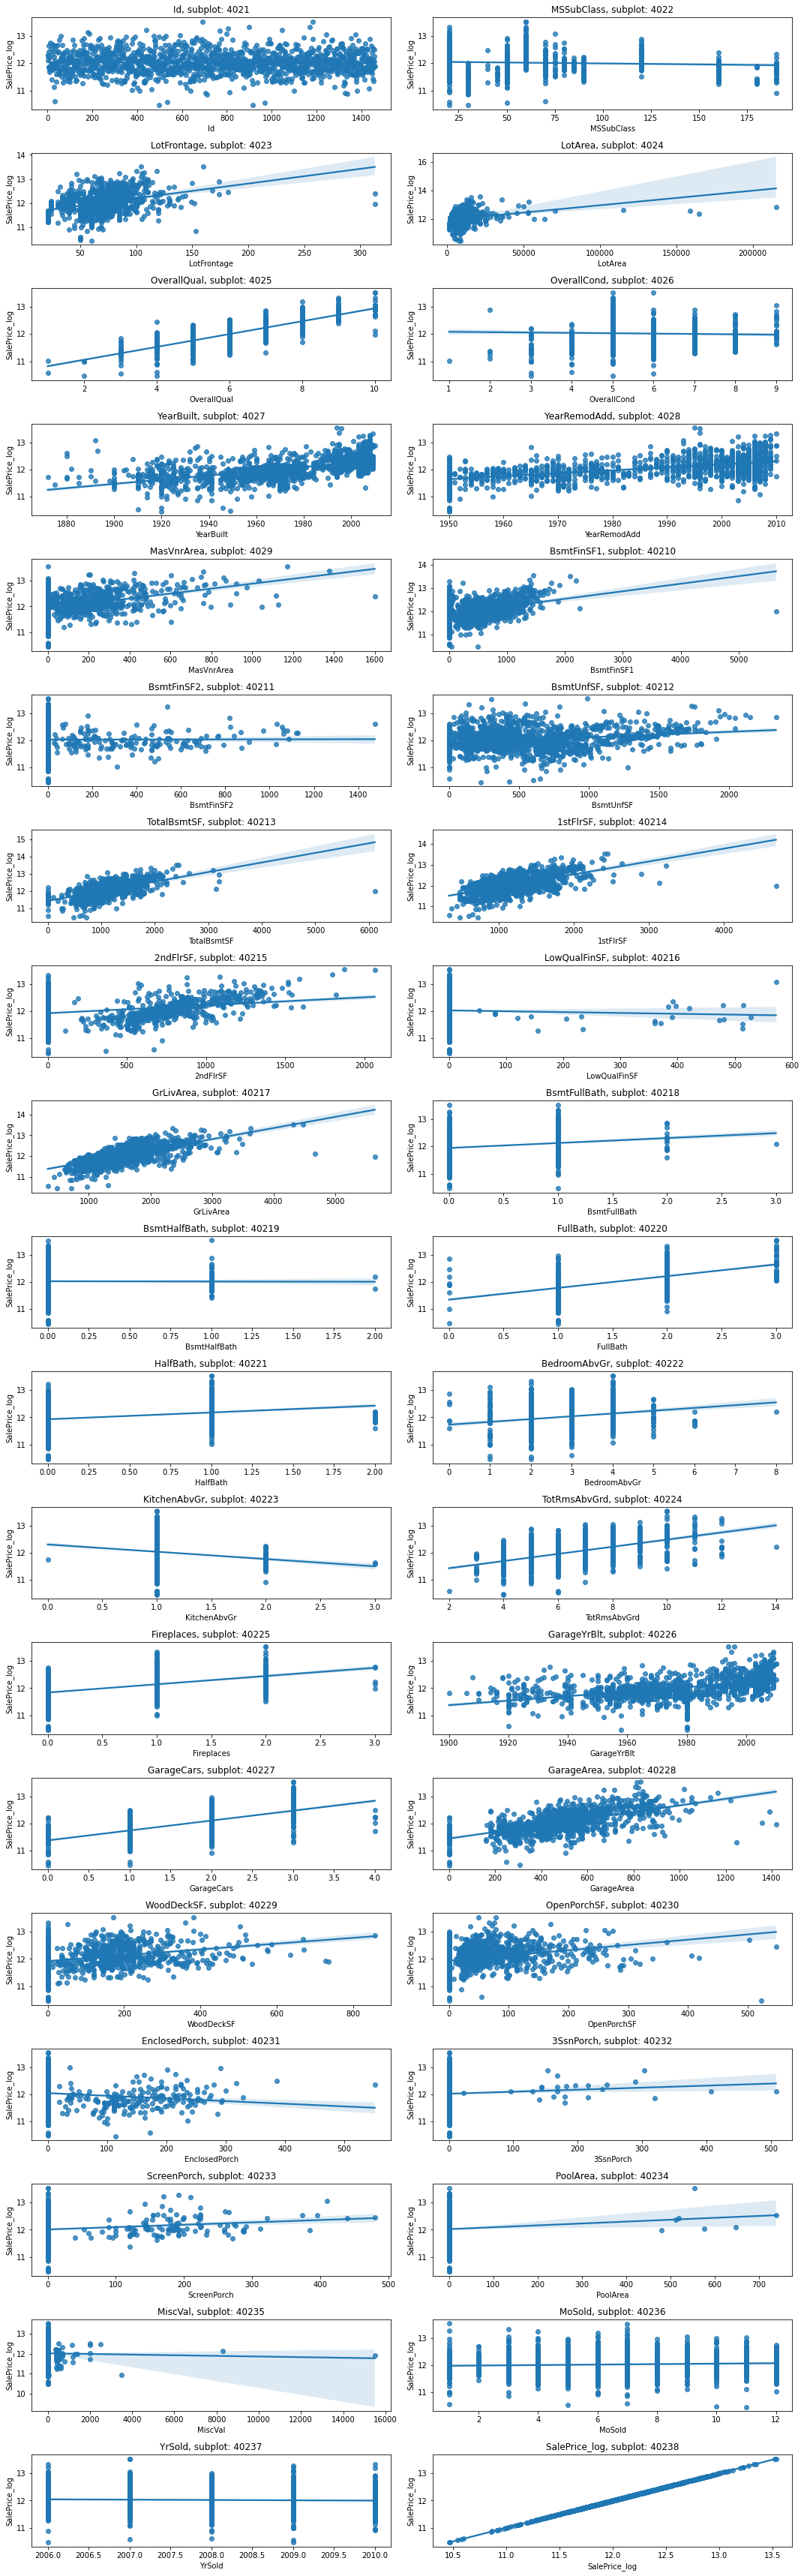

In [37]:
a = 40
b = 2
c = 1

fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15, 100)

for i in num_col:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.regplot(num_data[i], num_data['SalePrice_log'])
    c = c + 1

plt.tight_layout()
plt.show();

### Drop the columns that are not strongly correlated to the target variable numerical features that are less than a threshold corr value

In [42]:
# num_corr_data = num_data.corr()
# top_corr_num_col = num_corr_data.index[abs(num_corr_data['SalePrice_log'])>0.2]
# top_corr_num_col

In [43]:
# num_data_f = num_data[top_corr_num_col]
# num_data_f.shape

In [44]:
# plt.figure(figsize=(20,7))
# sns.heatmap(num_data_f.corr(),annot=True,cmap="RdYlGn")

# Categorical Variables

In [218]:
cat_col = df.select_dtypes(include=object).columns.tolist()
cat_col[:5]

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities']

In [219]:
cat_df = df[cat_col]
cat_df.shape

(1460, 39)

In [220]:
cat_df.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [221]:
cat_df.isnull().sum().sort_values(ascending=False)[:20]

FireplaceQu     690
GarageCond       81
GarageQual       81
GarageFinish     81
GarageType       81
BsmtExposure     38
BsmtFinType2     38
BsmtCond         37
BsmtFinType1     37
BsmtQual         37
MasVnrType        8
Electrical        1
Heating           0
MSZoning          0
HeatingQC         0
CentralAir        0
Functional        0
PavedDrive        0
SaleType          0
KitchenQual       0
dtype: int64

In [222]:
cat_df['FireplaceQu'] = cat_df['FireplaceQu'].fillna('No Fireplace')
cat_df['GarageCond'] = cat_df['GarageCond'].fillna('No GarageCond')
cat_df['GarageQual'] = cat_df['GarageQual'].fillna('No GarageQual')
cat_df['GarageFinish'] = cat_df['GarageFinish'].fillna('No GarageFinish')
cat_df['GarageType'] = cat_df['GarageType'].fillna('No GarageType')

In [223]:
cat_df['BsmtFinType2'] = cat_df['BsmtFinType2'].fillna('No BsmtFinType2')
cat_df['BsmtExposure'] = cat_df['BsmtExposure'].fillna('No BsmtExposure')
cat_df['BsmtCond']     = cat_df['BsmtCond'].fillna('No BsmtCond')
cat_df['BsmtQual']     = cat_df['BsmtQual'].fillna('No BsmtQual')
cat_df['BsmtFinType1'] = cat_df['BsmtFinType1'].fillna('No BsmtFinType1')

In [224]:
cat_df['MasVnrType'] = cat_df['MasVnrType'].fillna('None')
cat_df['Electrical'] = cat_df['Electrical'].fillna(method='ffill')

In [228]:
# Adding Target variable
cat_df = pd.concat([cat_df,num_data_f[['SalePrice_log']]],axis=1)
cat_df.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice_log
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,No Fireplace,Attchd,RFn,TA,TA,Y,WD,Normal,12.247694
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,12.109011
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,12.317167
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml,11.849398
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,12.429216


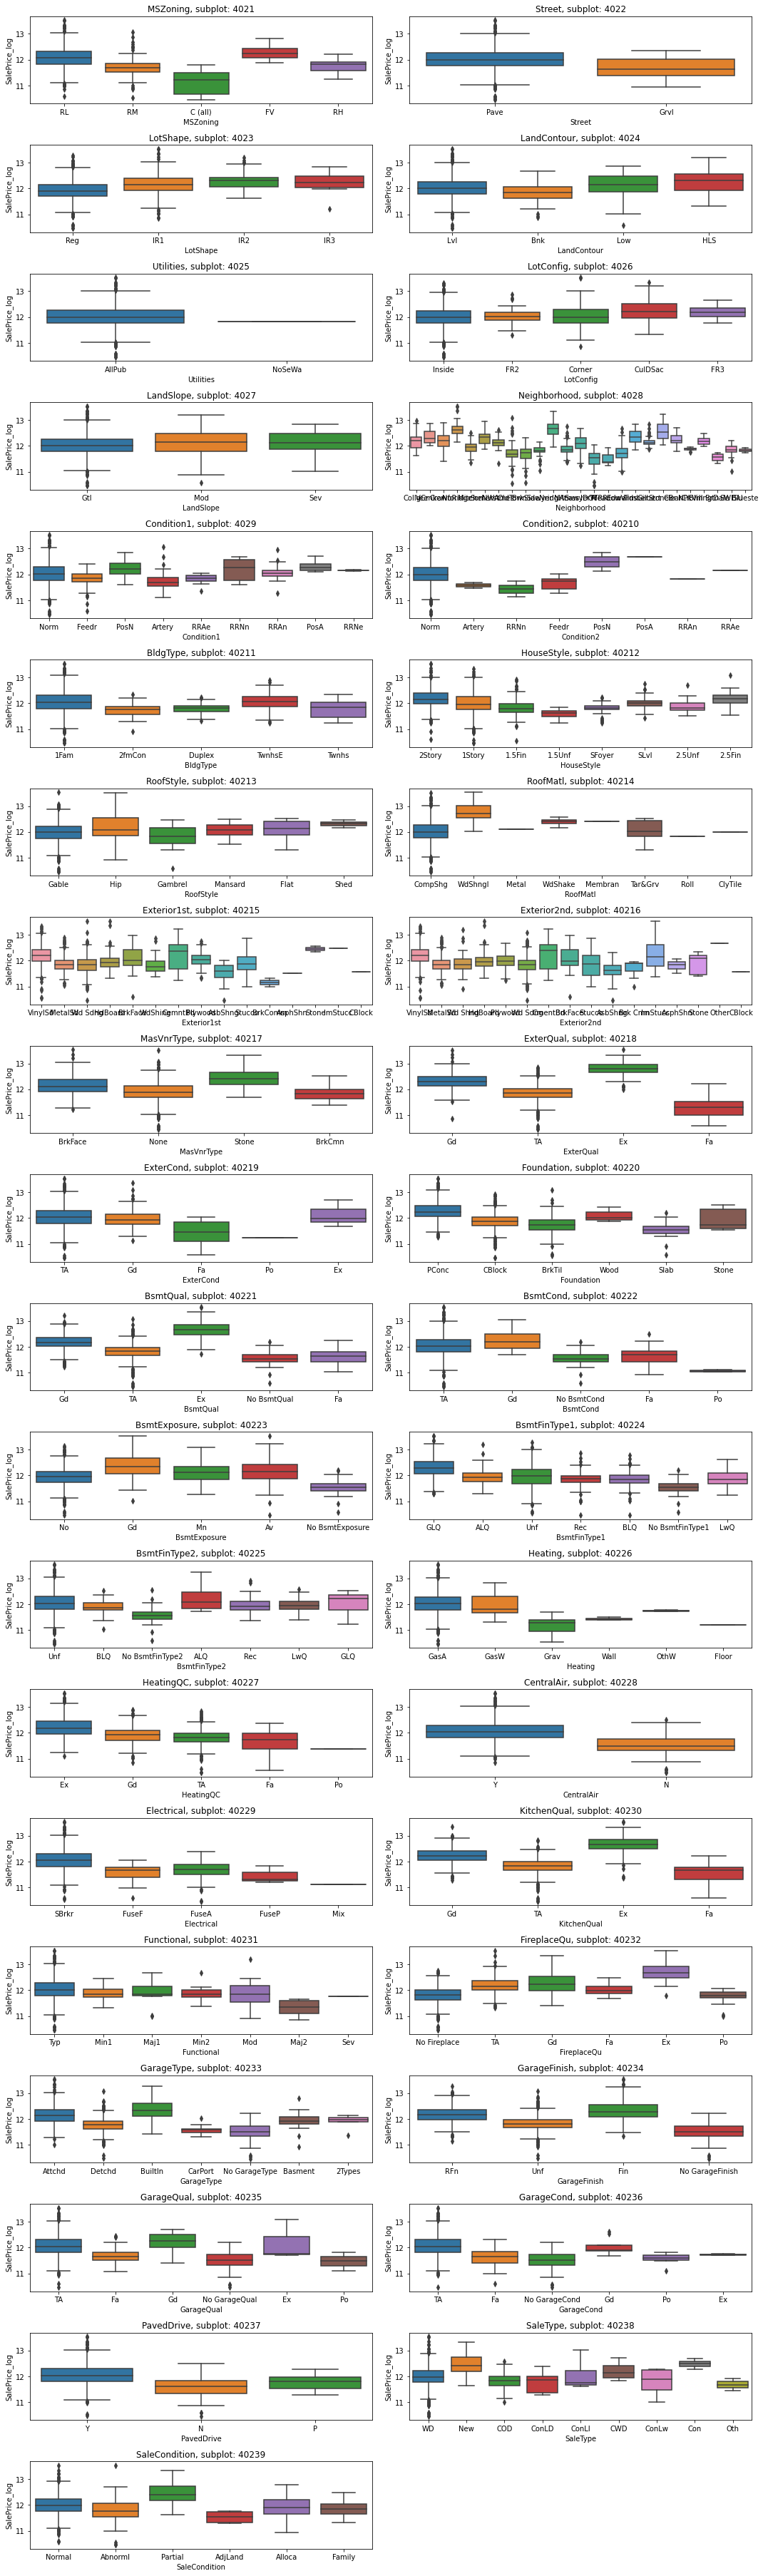

In [229]:
a = 40
b = 2
c = 1

fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15, 100)

for i in cat_col:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.boxplot(cat_df[i], cat_df['SalePrice_log'])
    c = c + 1

plt.tight_layout()
plt.show();

The categorical variables are corelated to the target variable Saleprice if the mean and the distrubition are different / varying for each features of a particular variable

In [230]:
# top_corr_cat_col = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
#  'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
#  'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
#  'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
#                     'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

## Q- What else we can do to identify the correlation between Categorical and Y variable

In [231]:
# cat_df_f = cat_df[top_corr_cat_col]
# cat_df_f.shape

# One hot Encoding - Encoding Categorical Features

In [232]:
#convert categorical variable into dummy
cat_df_f = pd.get_dummies(cat_df,drop_first = True)

In [233]:
cat_df_f.shape

(1460, 211)

In [234]:
cat_df_f.head()

,SalePrice_log,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No BsmtQual,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No BsmtCond,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No BsmtExposure,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No BsmtFinType1,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No BsmtFinType2,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No GarageType,GarageFinish_No GarageFinish,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No GarageQual,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No GarageCond,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,12.247694,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1

In [241]:
cat_df_f = cat_df_f.drop('SalePrice_log', axis=1)

# Final DataFrame

In [243]:
df_total =  pd.concat([df[['Id']],cat_df_f,num_data],axis=1)
df_total.shape

(1460, 249)

In [244]:
df_total.head()

,Id,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No BsmtQual,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No BsmtCond,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No BsmtExposure,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No BsmtFinType1,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No BsmtFinType2,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No GarageType,GarageFinish_No GarageFinish,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No GarageQual,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No GarageCond,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePri

EDA part is complete - Model ready data is available

# Target and Independent variables to be selected

In [245]:
X = df_total.drop('SalePrice_log',axis =1)
y = df_total.pop('SalePrice_log')
print('X shape',X.shape)
print('y shape',y.shape)

X shape (1460, 248)
y shape (1460,)


In [246]:
X_Id = X[['Id']].copy()
X = X.drop('Id',axis = 1)
print('X shape',X.shape)

X shape (1460, 246)


# Train Test Split

In [247]:
from sklearn.model_selection import train_test_split

In [248]:
X_train, X_test, train_labels, test_labels = train_test_split(X,y,
                                                              test_size=0.3,
                                                              random_state =1)

In [249]:
print('X train shape',X_train.shape)
print('X test shape',X_train.shape)
print('y train shape',train_labels.shape)
print('y test shape',test_labels.shape)

X train shape (1022, 246)
X test shape (1022, 246)
y train shape (1022,)
y test shape (438,)


In [250]:
# X_train_Id = X_train[['Id']].copy()
# X_test_Id = X_test[['Id']].copy()

In [251]:
# X_train = X_train.drop('Id',axis=1)
# X_test = X_test.drop('Id',axis=1)

In [252]:
# print('X train shape',X_train.shape)
# print('X test shape',X_train.shape)
# print('y train shape',train_labels.shape)
# print('y test shape',test_labels.shape)

# Linear Regression

In [254]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [255]:
lm = LinearRegression()

In [256]:
%%time
lm.fit(X_train,train_labels)

CPU times: user 187 ms, sys: 17.2 ms, total: 204 ms
Wall time: 41.2 ms


LinearRegression()

## Prediction

In [257]:
y_pred_train_lr = lm.predict(X_train)
y_pred_test_lr =  lm.predict(X_test)

In [258]:
# print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(train_labels, y_pred_train_lr))))
# print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(test_labels, y_pred_test_lr))))

In [259]:
# test_labels_lr = pd.DataFrame(test_labels)
# test_labels_lr.to_csv('test_labels_lr.csv')

In [84]:
# y_pred_test_lr = pd.DataFrame(y_pred_test_lr)
# y_pred_test_lr.to_csv('y_pred_test_lr.csv')

In [2]:
# print("R-Square for training data",lm.score(X_train,train_labels)) # Return the coefficient of determination R^2 of the prediction.
# # print("R-Square for test data",lm.score(X_test,test_labels))

In [85]:
# X_test.loc[[375,1270,325,120,1011,1003],:].head(10)

In [86]:
# X_test.head(10)

In [87]:
# #dropping some of the observations due to erros in the prediction values 
# X_test_update = X_test.drop([375,1270,325,120,1011,1003],axis=0)

In [88]:
# y_pred_test_lr_update =  lm.predict(X_test_update)
# y_pred_test_lr_update.shape

In [89]:
# test_labels_update = test_labels.drop([375,1270,325,120,1011,1003],axis=0)
# test_labels_update.shape

In [260]:
print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(train_labels, y_pred_train_lr))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(test_labels, y_pred_test_lr))))

Root Mean Square Error train = 0.08667803596390662
Root Mean Square Error test = 0.1887173083014805


In [261]:
print("R-Square for training data",lm.score(X_train,train_labels)) # Return the coefficient of determination R^2 of the prediction.
print("R-Square for test data",lm.score(X_test,test_labels))

R-Square for training data 0.948732947335942
R-Square for test data 0.8115544835440578


## Parameter Tuning with CV in LM

In [96]:
# from sklearn.model_selection import KFold, RepeatedKFold,cross_val_score,GridSearchCV
# from sklearn.metrics import mean_squared_error,make_scorer

In [97]:
# n_folds = 5

# scorer = make_scorer(mean_squared_error,greater_is_better = False)

# def rmse_CV_train(model):
#     kf = KFold(n_folds,shuffle=True,random_state=42).get_n_splits(X.values)
#     rmse = np.sqrt(-cross_val_score(model,X_train,train_labels,scoring ="neg_mean_squared_error",cv=kf))
#     return (rmse)

# def rmse_CV_test(model):
#     kf = KFold(n_folds,shuffle=True,random_state=42).get_n_splits(X.values)
#     rmse = np.sqrt(-cross_val_score(model,X_test_update,test_labels_update,scoring ="neg_mean_squared_error",cv=kf))
#     return (rmse)

In [98]:
# lr_cv = LinearRegression()
# lr_cv.fit(X_train,train_labels)

## Prediction

In [115]:
# y_pred_train_lr_cv = lr_cv.predict(X_train)
# y_pred_test_lr_cv =  lr_cv.predict(X_test_update)

In [99]:
# print('rmse on train',rmse_CV_train(lr_cv).mean())
# print('rmse on test',rmse_CV_test(lr_cv).mean())

# Ridge Regression

In [262]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

lm_ridge=Ridge() # Ridge Regression

parameters= {'alpha':[x for x in [0.0005,0.001,0.01,0.1,0.2,0.4,0.5,0.7,0.8,1]]}

In [263]:
lm_ridge_grd = GridSearchCV(estimator = lm_ridge, param_grid=parameters)

In [264]:
lm_ridge_grd.fit(X_train,train_labels)

print("The best value of Alpha is: ",lm_ridge_grd.best_params_,lm_ridge_grd.best_score_)

The best value of Alpha is:  {'alpha': 1} 0.8267522667958783


In [265]:
lm_ridge_best_gcv = lm_ridge_grd.best_estimator_
lm_ridge_best_gcv

Ridge(alpha=1)

In [266]:
lm_ridge_best_gcv.fit(X_train,train_labels)

Ridge(alpha=1)

## Coefficient Values

In [282]:
print(lm_ridge_best_gcv.coef_)

array([ 1.00260395e-01,  1.11075049e-01,  8.61582007e-02,  4.79329976e-02,
        5.03364350e-03,  3.67573138e-02, -6.17361884e-02, -2.77094812e-03,
        8.78830451e-02,  2.13167880e-02,  8.80093944e-02, -1.56449072e-01,
        2.87199572e-02, -2.84694510e-02, -5.32724980e-02, -1.34506820e-02,
        2.20920542e-02, -6.18340304e-02, -4.32106424e-02, -4.88140747e-02,
       -8.61005037e-03,  4.04640068e-02, -1.18875596e-02,  1.12039134e-01,
       -9.82341759e-02, -2.07268528e-02, -4.60903377e-02, -1.50328454e-01,
       -3.98763518e-02, -4.93604283e-02, -5.74204378e-03, -3.52258073e-02,
        6.12326451e-02,  1.30334041e-01, -7.09629120e-02, -3.20490183e-02,
       -3.98979275e-02,  9.93407672e-03,  3.13522303e-02,  1.73346552e-01,
        1.00926276e-02,  1.35036859e-02,  6.12441469e-03,  6.93744543e-02,
        2.94356116e-02,  4.55267582e-02, -2.26916783e-02,  4.84880154e-02,
       -7.29127535e-03,  7.30040283e-02,  7.80712248e-02,  4.55712346e-02,
        1.13689405e-01, -

## Prediction

In [267]:
y_pred_train_ridge_gcv = lm_ridge_best_gcv.predict(X_train)
y_pred_test_ridge_gcv =  lm_ridge_best_gcv.predict(X_test)

In [268]:
print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(train_labels, y_pred_train_ridge_gcv))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(test_labels, y_pred_test_ridge_gcv)))) 

Root Mean Square Error train = 0.09939322518900394
Root Mean Square Error test = 0.1501224556878534


In [269]:
print("R-Square for training data",lm_ridge_best_gcv.score(X_train,train_labels)) # Return the coefficient of determination R^2 of the prediction.
print("R-Square for training data",lm_ridge_best_gcv.score(X_test,test_labels))

R-Square for training data 0.9325885307555586
R-Square for training data 0.880751297621799


# LASSO 

In [270]:
from sklearn.linear_model import Lasso

In [271]:
lm_lasso =Lasso()
parameters= {'alpha':[x for x in [0.0005,0.001,0.01,0.1,0.2,0.4,0.5,0.7,0.8,1]]}

In [272]:
lm_lasso_grd = GridSearchCV(estimator=lm_lasso, 
                            param_grid=parameters)

In [273]:
lm_lasso_grd.fit(X_train,train_labels)

print("The best value of Alpha is: ",lm_lasso_grd.best_params_,lm_lasso_grd.best_score_)

The best value of Alpha is:  {'alpha': 0.001} 0.8416796415035124


In [274]:
lm_lasso_best_gcv = lm_lasso_grd.best_estimator_
lm_lasso_best_gcv

Lasso(alpha=0.001)

In [275]:
lm_lasso_best_gcv.fit(X_train,train_labels)

Lasso(alpha=0.001)

## Coefficient values

In [283]:
print(lm_lasso_best_gcv.coef_)

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -6.46851682e-02
 -0.00000000e+00  6.49155532e-03 -0.00000000e+00 -4.44397139e-03
  8.71762615e-03  0.00000000e+00  4.14872125e-02 -0.00000000e+00
  3.02887798e-02 -0.00000000e+00 -0.00000000e+00 -2.75162951e-03
  1.36274517e-02 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  3.04046441e-03  3.55394365e-03 -0.00000000e+00  1.27420452e-01
 -5.19287948e-02 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  2.00314826e-02  1.07430931e-01 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  1.99967375e-02  1.12456827e-01
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  4.92696036e-02
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -3.05836836e-02 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  2.73781604e-03 -0.00000000e+00 -1.06922816e-02
 -0.00000000e+00  0.00000

## Prediction

In [279]:
y_pred_train_lasso_gcv = lm_lasso_best_gcv.predict(X_train)
y_pred_test_lasso_gcv =  lm_lasso_best_gcv.predict(X_test)

In [280]:
print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(train_labels, y_pred_train_lasso_gcv))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(test_labels, y_pred_test_lasso_gcv)))) 

Root Mean Square Error train = 0.11831788480707972
Root Mean Square Error test = 0.15008724238253318


In [281]:
print("R-Square for training data",lm_lasso_best_gcv.score(X_train,train_labels)) # Return the coefficient of determination R^2 of the prediction.
print("R-Square for training data",lm_lasso_best_gcv.score(X_test,test_labels))

R-Square for training data 0.9044741258388409
R-Square for training data 0.8808072339367661


# ElasticNet

In [164]:
# print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(train_labels, y_pred_train_lasso_gcv))))
# print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(test_labels_update, y_pred_test_lasso_gcv)))) 

In [284]:
from sklearn.linear_model import ElasticNet

In [285]:
lm_elastic = ElasticNet()
parameters= {'alpha':[x for x in [0.0005,0.1,0.001,0.01,0.2,0.4,0.5,0.7,0.8,1]]}

In [286]:
lm_elastic_grd = GridSearchCV(lm_elastic, param_grid=parameters)

In [287]:
lm_elastic_grd.fit(X_train,train_labels)

print("The best value of Alpha is: ",lm_elastic_grd.best_params_,lm_elastic_grd.best_score_)

The best value of Alpha is:  {'alpha': 0.001} 0.8411907183226084


In [288]:
lm_elastic_best_gcv = lm_elastic_grd.best_estimator_
lm_elastic_best_gcv

ElasticNet(alpha=0.001)

In [289]:
lm_elastic_best_gcv.fit(X_train,train_labels)

ElasticNet(alpha=0.001)

## Prediction

In [290]:
y_pred_train_elastic_gcv = lm_elastic_best_gcv.predict(X_train)
y_pred_test_elastic_gcv =  lm_elastic_best_gcv.predict(X_test)

In [291]:
print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(train_labels, y_pred_train_elastic_gcv))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(test_labels, y_pred_test_elastic_gcv)))) 

Root Mean Square Error train = 0.11090966984100631
Root Mean Square Error test = 0.1500551577328118


In [292]:
print("R-Square for training data",lm_elastic_best_gcv.score(X_train,train_labels)) # Return the coefficient of determination R^2 of the prediction.
print("R-Square for training data",lm_elastic_best_gcv.score(X_test,test_labels))

R-Square for training data 0.9160619160446888
R-Square for training data 0.8808581889589993


Looking at the obtained results, the model giving us better results is the Lasso and Ridge Regression model